In [1]:
#Importing all the necessary libraries for machine learning
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
#Reading dataset
country_df = pd.read_csv('country_data.csv')

In [3]:
#Printing first 5 rows
print(country_df.head(5))

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


In [4]:
print(country_df.describe().transpose())

            count          mean           std       min       25%      50%  \
child_mort  167.0     38.270060     40.328931    2.6000     8.250    19.30   
exports     167.0     41.108976     27.412010    0.1090    23.800    35.00   
health      167.0      6.815689      2.746837    1.8100     4.920     6.32   
imports     167.0     46.890215     24.209589    0.0659    30.200    43.30   
income      167.0  17144.688623  19278.067698  609.0000  3355.000  9960.00   
inflation   167.0      7.781832     10.570704   -4.2100     1.810     5.39   
life_expec  167.0     70.555689      8.893172   32.1000    65.300    73.10   
total_fer   167.0      2.947964      1.513848    1.1500     1.795     2.41   
gdpp        167.0  12964.155689  18328.704809  231.0000  1330.000  4660.00   

                 75%        max  
child_mort     62.10     208.00  
exports        51.35     200.00  
health          8.60      17.90  
imports        58.75     174.00  
income      22800.00  125000.00  
inflation      

In [5]:
#Checking if there are any null values in the dataset
print(country_df.apply(lambda x: sum(x.isnull()), axis=0))

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [6]:
print('Size of a dataset before removing duplicates:', country_df.shape)
country_df.drop_duplicates(subset=None, inplace=True)
print('Size of a dataset after removing duplicates', country_df.shape)

Size of a dataset before removing duplicates: (167, 10)
Size of a dataset after removing duplicates (167, 10)


In [7]:
print(country_df.head(4))

       country  child_mort  exports  health  imports  income  inflation  \
0  Afghanistan        90.2     10.0    7.58     44.9    1610       9.44   
1      Albania        16.6     28.0    6.55     48.6    9930       4.49   
2      Algeria        27.3     38.4    4.17     31.4   12900      16.10   
3       Angola       119.0     62.3    2.85     42.9    5900      22.40   

   life_expec  total_fer  gdpp  
0        56.2       5.82   553  
1        76.3       1.65  4090  
2        76.5       2.89  4460  
3        60.1       6.16  3530  


## Visualizing Data

**Child Mortality Rate**

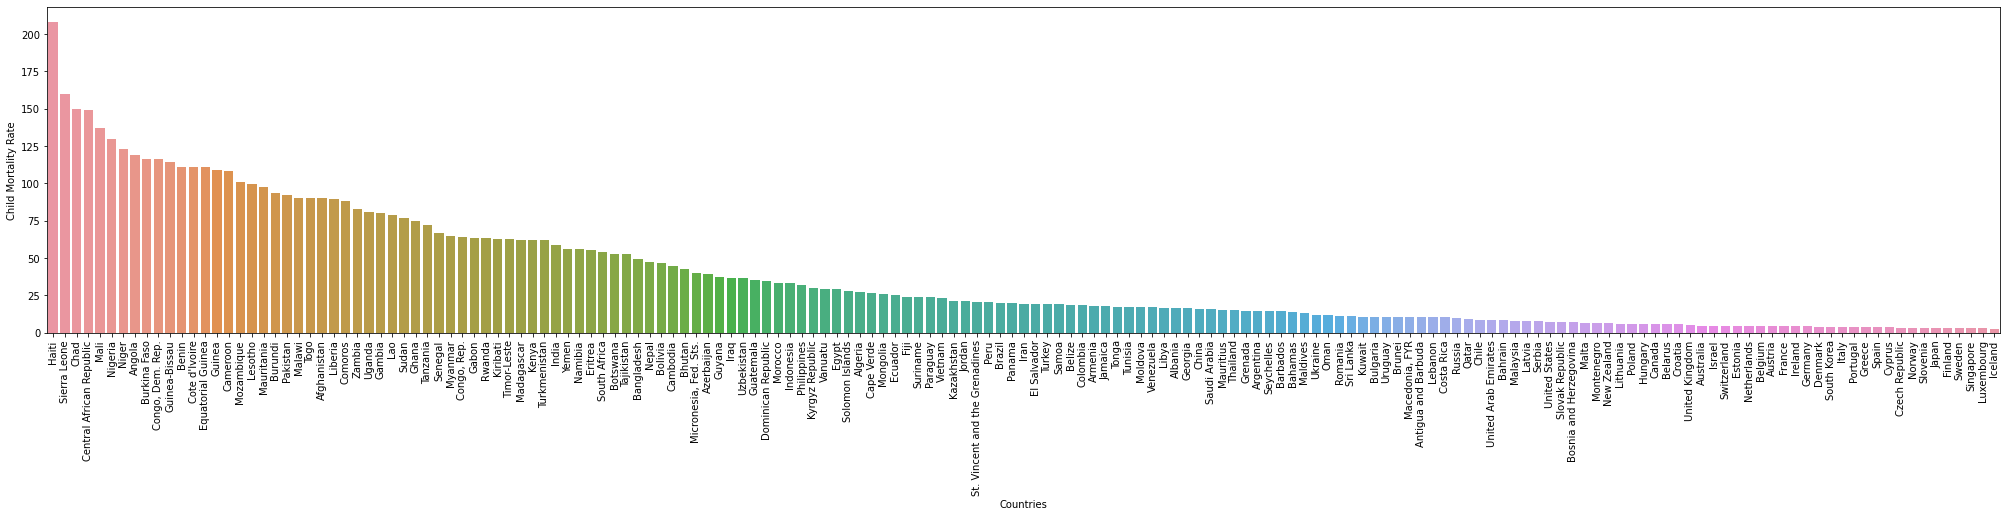

In [8]:
plt.figure(figsize = (35,6))
child_mortality = country_df[['country','child_mort']].sort_values('child_mort', ascending = False)
ax = sns.barplot(x='country', y='child_mort', data= child_mortality)
ax.set(xlabel = 'Countries', ylabel= 'Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

**As we can see from the above barplot that child mortality rate is higher in most African nations.**

**Life expectancy**

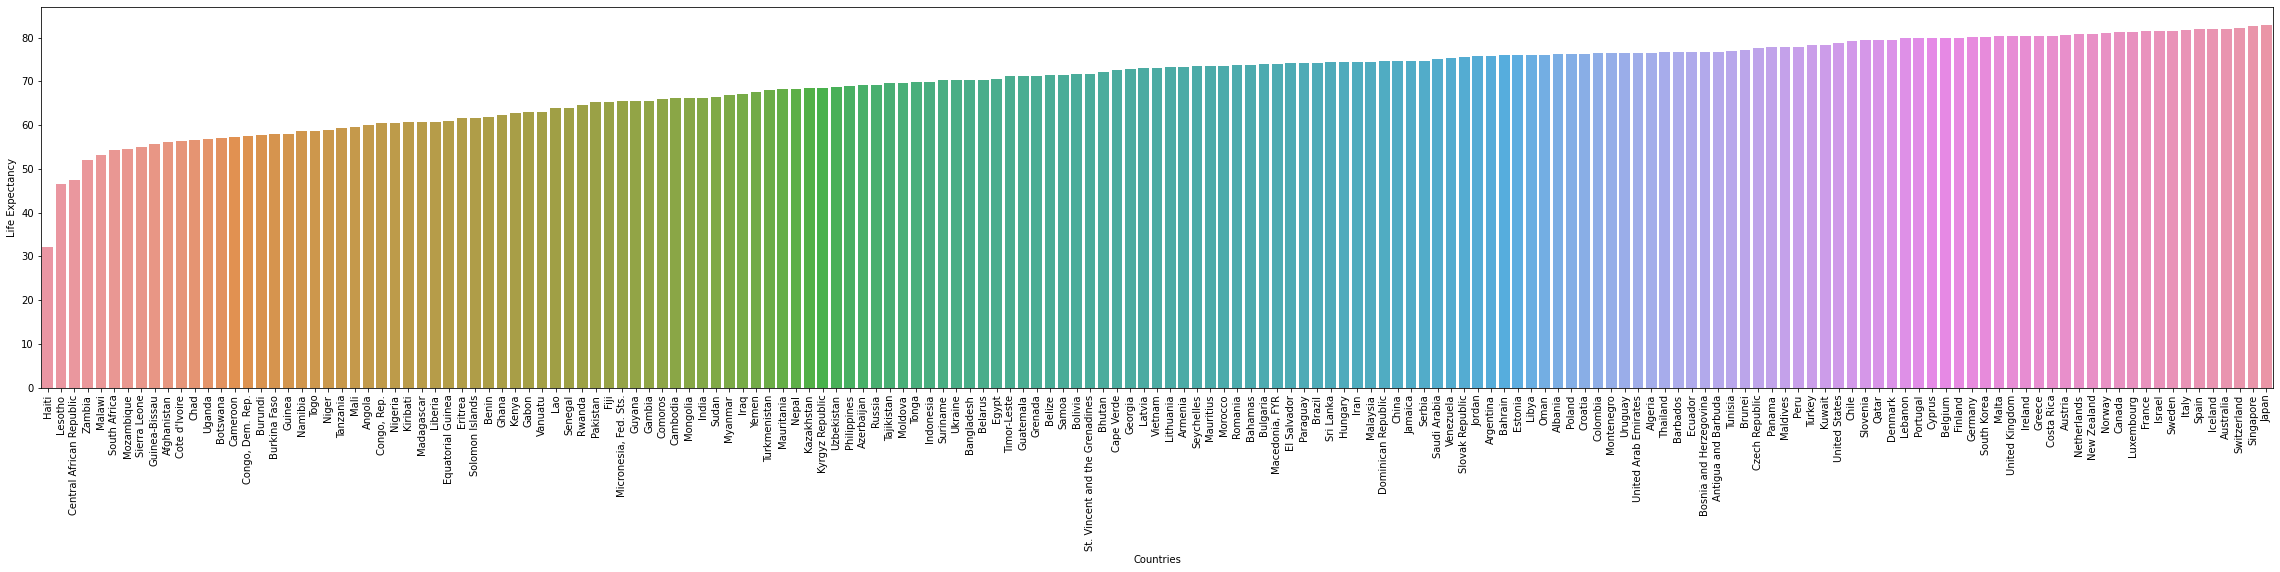

In [9]:
#Plotting bar graph of life expectancy for all countries
plt.figure(figsize = (40,7))
life_expectency = country_df[['country','life_expec']].sort_values('life_expec', ascending = True)
ax = sns.barplot(x='country', y='life_expec', data= life_expectency)
ax.set_xlabel('Countries')
ax.set_ylabel('Life Expectancy')
plt.xticks(rotation=90)
plt.savefig('Life-expec.png')
plt.show()

**Total health spending capita**

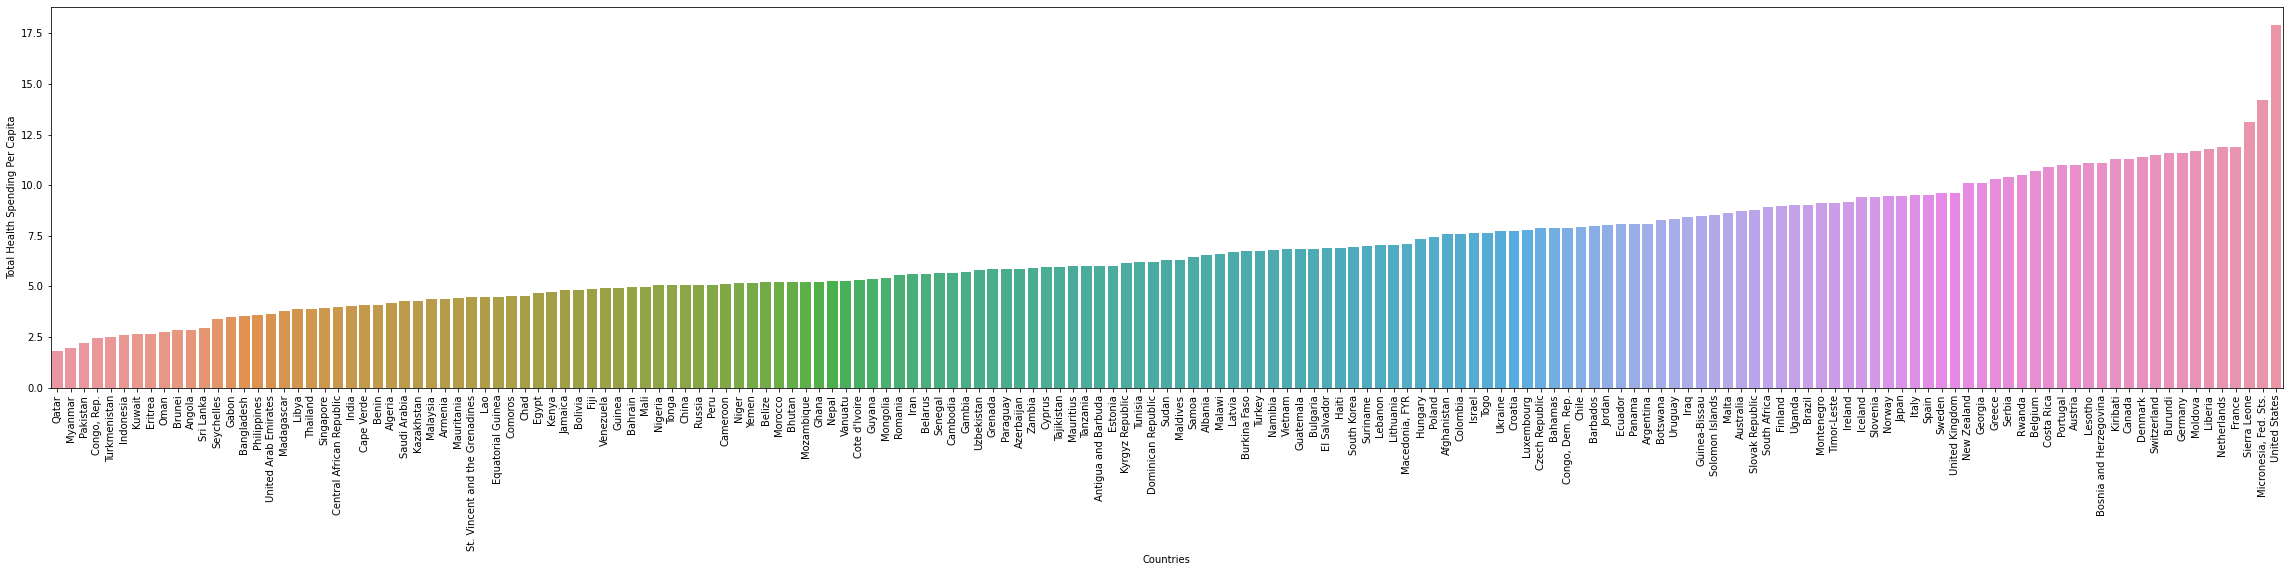

In [10]:
#Plotting bargraph of Total health spending for all countries 
plt.figure(figsize = (42,7))
health_data = country_df[['country','health']].sort_values('health', ascending = True)
ax = sns.barplot(x='country', y='health', data= health_data)
ax.set(xlabel = 'Countries', ylabel= 'Total Health Spending Per Capita')
plt.xticks(rotation=90)
plt.show()

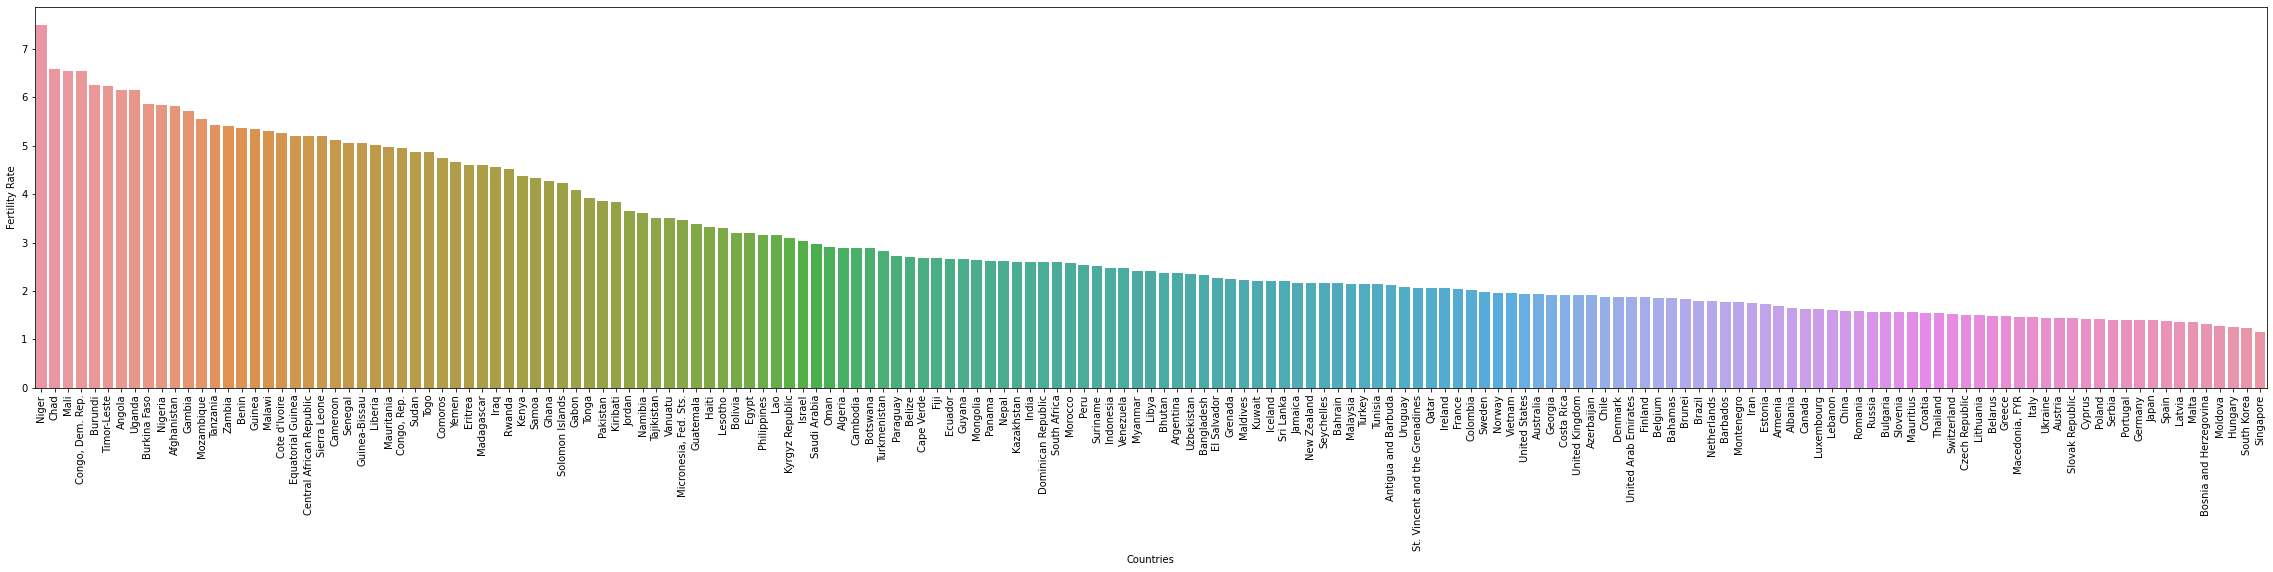

In [11]:
#Plotting bargraph of fertility rate for all countries 
plt.figure(figsize = (42,7))
total_fertility = country_df[['country','total_fer']].sort_values('total_fer', ascending = False)
ax = sns.barplot(x='country', y='total_fer', data= total_fertility)
ax.set(xlabel = 'Countries', ylabel= 'Fertility Rate')
plt.xticks(rotation=90)
plt.savefig('Fertility-rate.png')
plt.show()

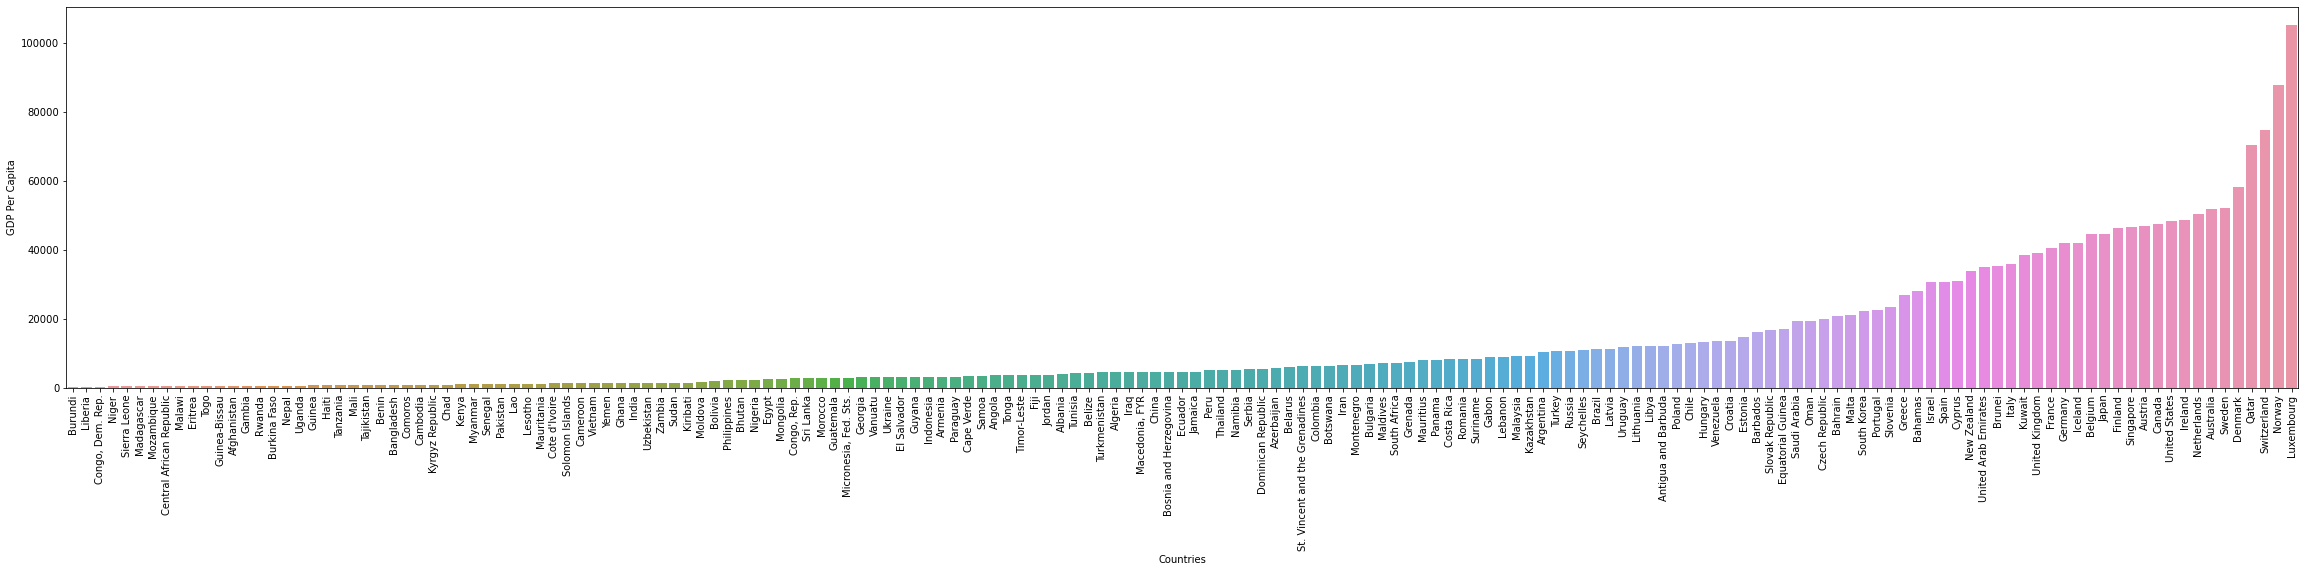

In [12]:
#Plotting bargraph of gdp for all countries
plt.figure(figsize = (40,7))
gdp_per_capita = country_df[['country','gdpp']].sort_values('gdpp', ascending = True)
ax = sns.barplot(x='country', y='gdpp', data= gdp_per_capita)
ax.set_xlabel('Countries')
ax.set_ylabel('GDP')
plt.xticks(rotation=90)
plt.savefig('GDP.png')
plt.show()

**Identifying top 10 countries on health**

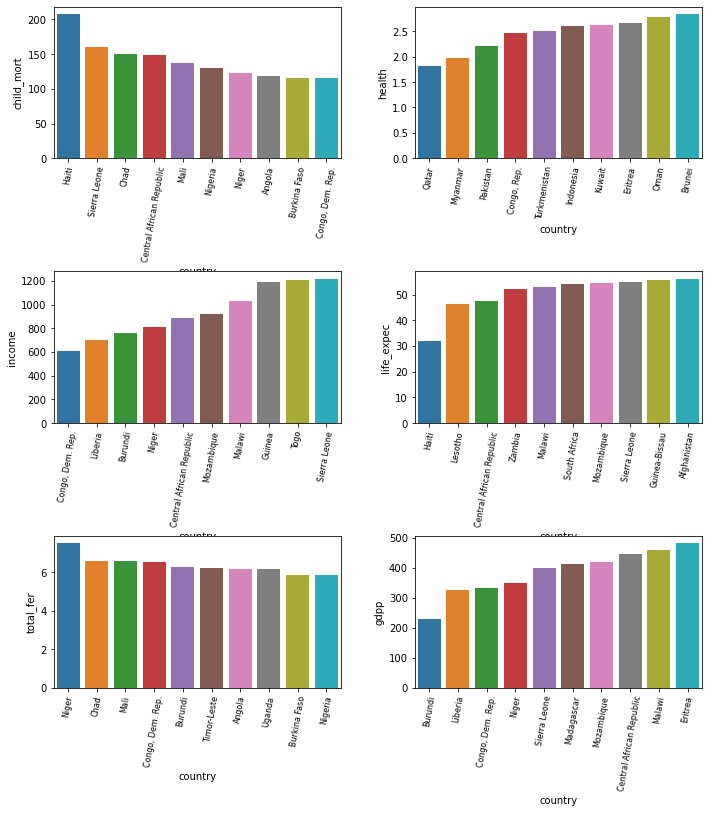

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (10,10))

child_mortality_top10 =child_mortality.head(10)
sns.barplot(data=child_mortality_top10, x='country', y='child_mort', ax=axes[0,0])

health_data_top10= health_data.sort_values('health', ascending = True).head(10)
sns.barplot(data=health_data_top10, x='country', y='health', ax=axes[0,1])


income_top10 = country_df[['country','income']].sort_values('income', ascending = True).head(10)
sns.barplot(data=income_top10, x='country', y='income', ax=axes[1,0])

life_expectency_top10 = life_expectency.head(10)
sns.barplot(data=life_expectency_top10, x='country', y='life_expec', ax=axes[1,1])

total_fertility_top10 = total_fertility.head(10)
sns.barplot(data=total_fertility_top10, x='country', y='total_fer', ax=axes[2,0])

gdp_per_capita_top10 = gdp_per_capita.head(10)
sns.barplot(data=gdp_per_capita_top10, x='country', y='gdpp', ax=axes[2,1])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=8.0)
for ax in axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 80, visible=True, size = 8)
plt.savefig('Country_hist.jpeg', dpi=500, bbox_inches='tight')
plt.show()

**Identifying top 10 countries on ecomic strengths**

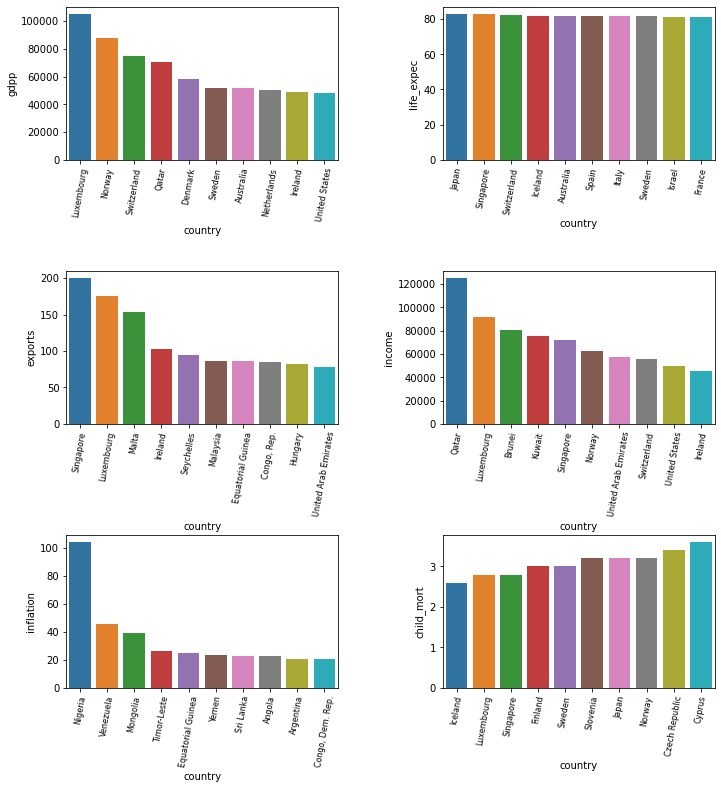

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (10,10))

gdp_top10 = country_df[['country','gdpp']].sort_values('gdpp', ascending = False).head(10)
sns.barplot(data=gdp_top10, x='country', y='gdpp', ax=axes[0,0])

life_data_top10 = country_df[['country','life_expec']].sort_values('life_expec', ascending = False).head(10)
sns.barplot(data=life_data_top10, x='country', y='life_expec', ax=axes[0,1])


exports_top10 = country_df[['country','exports']].sort_values('exports', ascending = False).head(10)
sns.barplot(data=exports_top10, x='country', y='exports', ax=axes[1,0])

income_top10 = country_df[['country','income']].sort_values('income', ascending = False).head(10)
sns.barplot(data=income_top10, x='country', y='income', ax=axes[1,1])

inflation_top10 = country_df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
sns.barplot(data=inflation_top10, x='country', y='inflation', ax=axes[2,0])

child_top10 = country_df[['country','child_mort']].sort_values('child_mort', ascending = True).head(10)
sns.barplot(data=child_top10, x='country', y='child_mort', ax=axes[2,1])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=8.0)
for ax in axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 80, visible=True, size = 8)
plt.savefig('Country_economy_hist.jpeg', dpi=500, bbox_inches='tight')
plt.show()

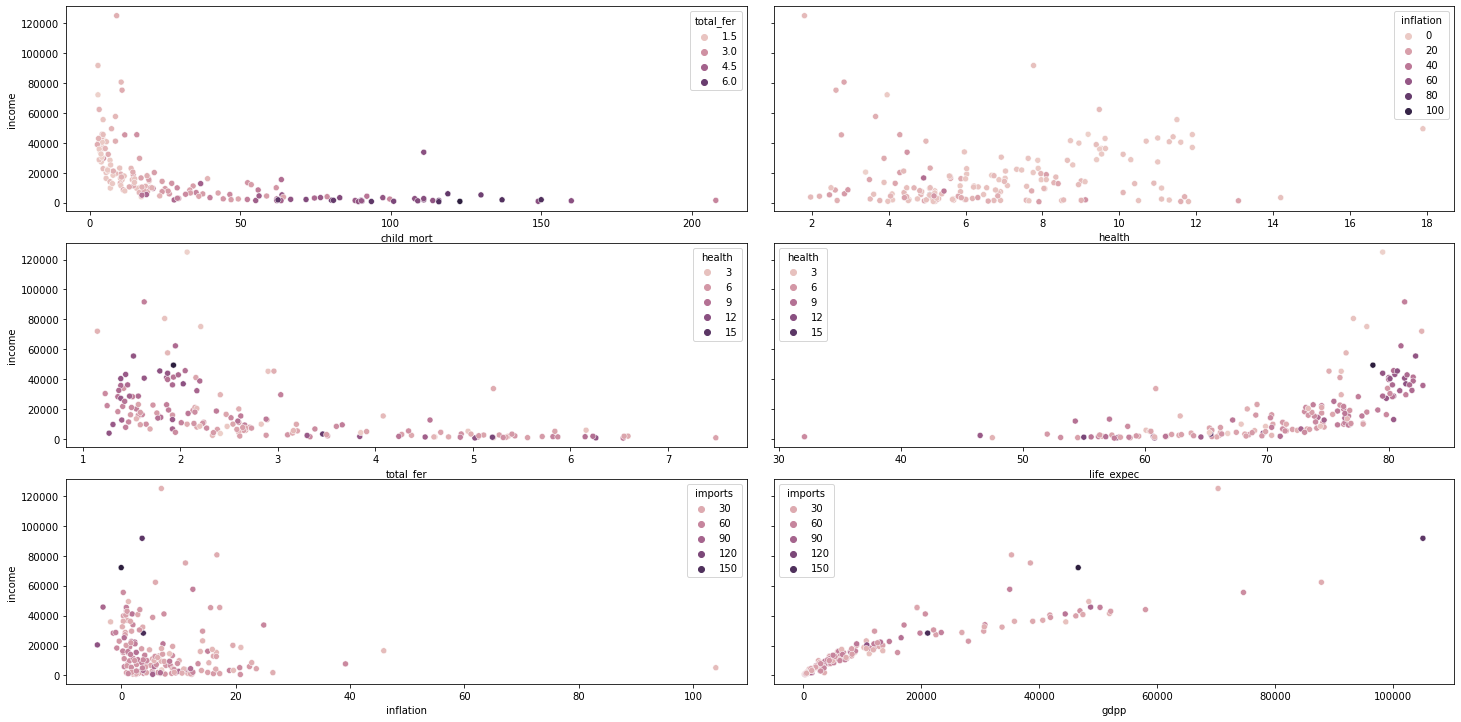

In [15]:
#Creating scatterplots to see how income is related to other variables
fig, axes = plt.subplots(nrows=3, ncols=2, sharey= True, figsize=(20,10))
fig.tight_layout()

sns.scatterplot(data=country_df, x='child_mort', y='income', hue= 'total_fer', ax=axes[0,0])
plt.ticklabel_format(style='plain')

sns.scatterplot(data=country_df, x='health', y='income', hue= 'inflation', ax=axes[0,1])
plt.ticklabel_format(style='plain')

sns.scatterplot(data=country_df, x='total_fer', y='income', hue= 'health', ax=axes[1,0])
plt.ticklabel_format(style='plain')

sns.scatterplot(data=country_df, x='life_expec', y='income', hue= 'health', ax=axes[1,1])
plt.ticklabel_format(style='plain')

sns.scatterplot(data=country_df, x='inflation', y='income', hue= 'imports', ax=axes[2,0])
plt.ticklabel_format(style='plain')

sns.scatterplot(data=country_df, x='gdpp', y='income', hue= 'imports', ax=axes[2,1])
plt.ticklabel_format(style='plain')
plt.savefig('rest_vs_income.jpeg', bbox_inches='tight')
plt.show()


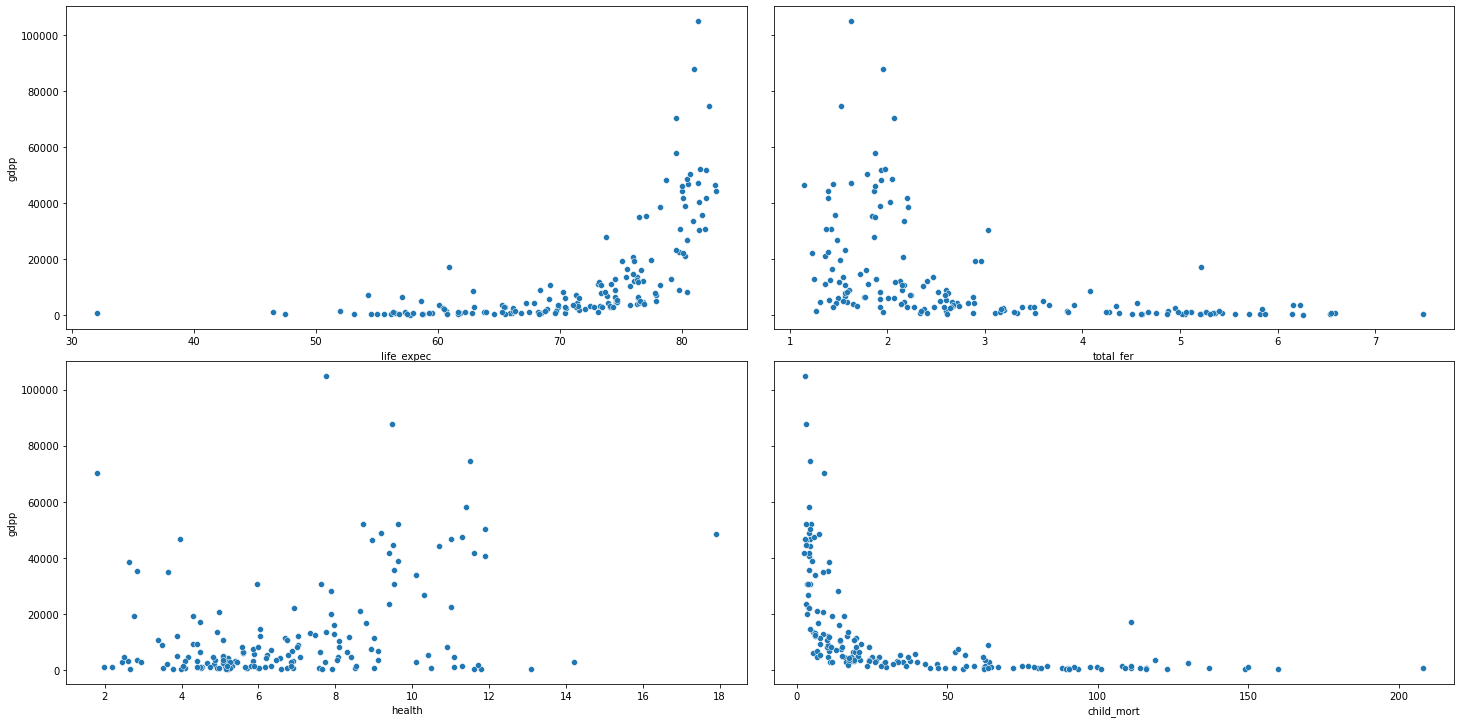

In [16]:
#Plotting scatterplot to see how GDP is related to other features
fig, axes = plt.subplots(nrows=2, ncols=2, sharey= True, figsize=(20,10))
fig.tight_layout()

sns.scatterplot(data=country_df, x='life_expec', y='gdpp', ax=axes[0,0])
plt.ticklabel_format(style='plain')

sns.scatterplot(data=country_df, x='total_fer', y='gdpp', ax=axes[0,1])
plt.ticklabel_format(style='plain')

sns.scatterplot(data=country_df, x='health', y='gdpp', ax=axes[1,0])
plt.ticklabel_format(style='plain')

sns.scatterplot(data=country_df, x='child_mort', y='gdpp', ax=axes[1,1])
plt.ticklabel_format(style='plain')

plt.ticklabel_format(style='plain')
plt.savefig('Health_info.jpeg', bbox_inches='tight')
plt.show()

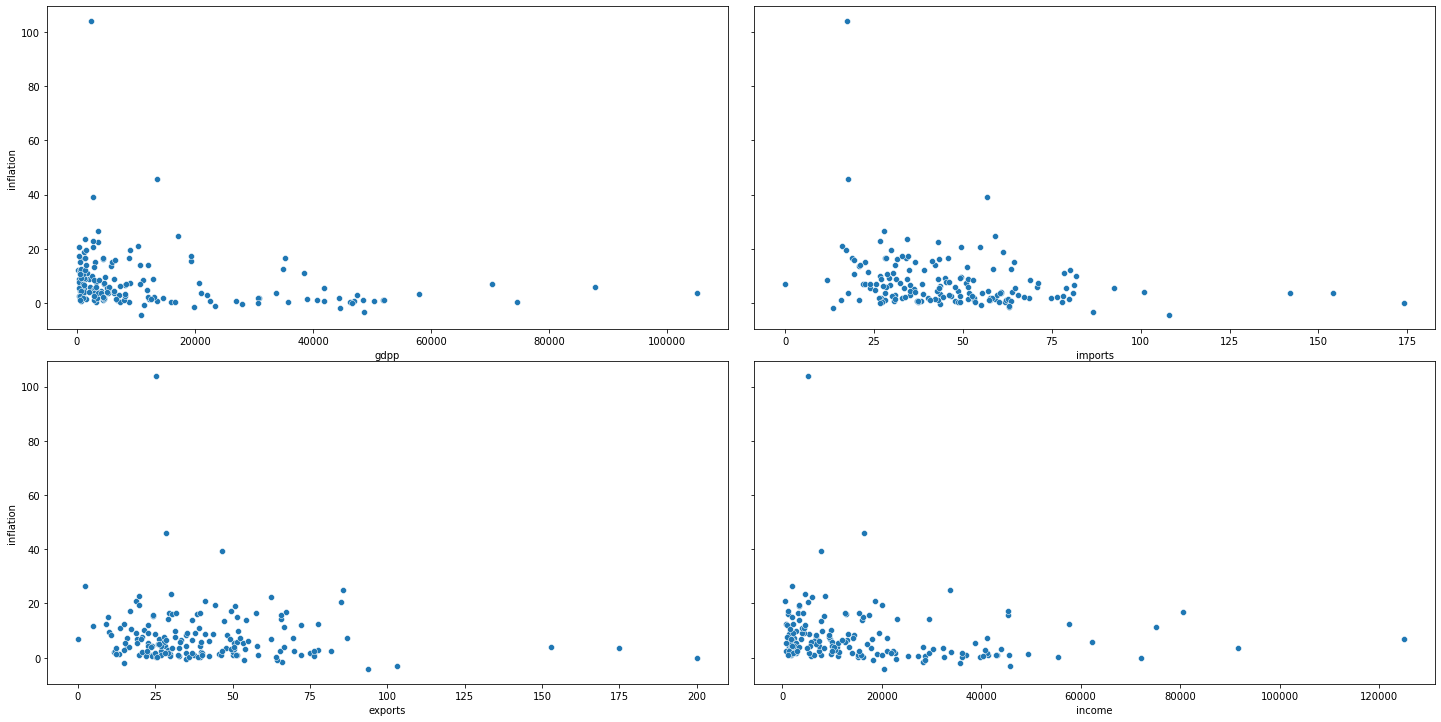

In [17]:
#Plotting scatterplots to see how inflation is related to other features
fig, axes = plt.subplots(nrows=2, ncols=2, sharey= True, figsize=(20,10))
fig.tight_layout()

sns.scatterplot(data=country_df, x='gdpp', y='inflation', ax=axes[0,0])
plt.ticklabel_format(style='plain')

sns.scatterplot(data=country_df, x='imports', y='inflation', ax=axes[0,1])
plt.ticklabel_format(style='plain')

sns.scatterplot(data=country_df, x='exports', y='inflation', ax=axes[1,0])
plt.ticklabel_format(style='plain')

sns.scatterplot(data=country_df, x='income', y='inflation', ax=axes[1,1])
plt.ticklabel_format(style='plain')

plt.ticklabel_format(style='plain')
plt.savefig('inflation.jpeg', bbox_inches='tight')
plt.show()


<AxesSubplot:xlabel='gdpp', ylabel='life_expec'>

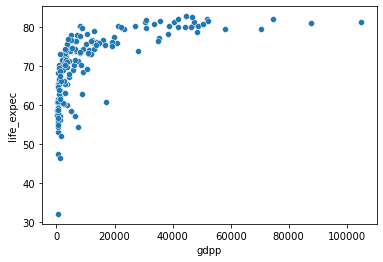

In [18]:
sns.scatterplot(data=country_df, x='gdpp', y='life_expec')

## Analyzing Health 

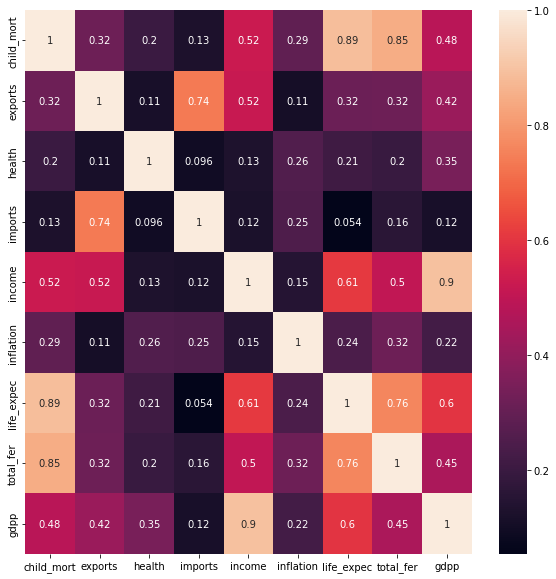

In [19]:
#Visualizing the feature's importance
health_corr_data = country_df
correlation_matrix = health_corr_data.corr().abs()
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_matrix,annot=True)
plt.savefig('Country_correlation_heatmap.jpeg', dpi=100)

- Child mortality rate is highly correlated with life expectancy, total fertility, and income.
- Life expectancy is highly correlated with child mortality, income, gdp, and total fertility.
- Total fertility is highly correlated with child mortality, income and life expectancy.
- Health is highly correlated with gdpp.

In [20]:
#Creating input variables/features for our model
clustering_health_data = country_df.drop(['country', 'exports', 'imports', 'health','income'], axis=1)

In [21]:
#Scaling our data in a uniform scale
clustering_health_data = StandardScaler().fit_transform(clustering_health_data)

C:\Users\subas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


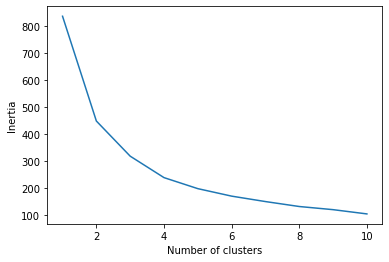

In [22]:
inertias = []
for i in range(1,11):
    km=KMeans(n_clusters=i, init='k-means++', max_iter=400, n_init=10, random_state=3)
    km.fit(clustering_health_data)
    inertias.append(km.inertia_)
plt.plot(range(1,11),inertias)
plt.xlabel('Clusters #')
plt.ylabel('Total inertia')
plt.savefig('inertia-1.jpeg', dpi=100)
plt.show()

We can see from the above inertia graph that the total number of clusters is 3.

In [23]:
#Creating Kmeans model using 3 clusters
kmeans_health = KMeans(n_clusters=3, max_iter=150, random_state=6)

In [24]:
#Training the model using our dataset
kmeans_health.fit(clustering_health_data)

KMeans(max_iter=150, n_clusters=3, random_state=6)

In [25]:
#Adding new column to our existing dataset
country_df['Assigned_Cluster_Id'] = kmeans_health.labels_

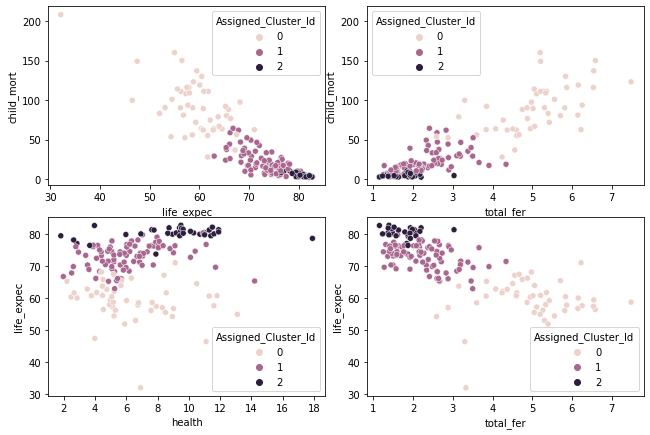

In [26]:
#Visualizing our clusters
centers = kmeans_health.cluster_centers_
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (9,6))
fig.tight_layout()

sns.scatterplot(data=country_df, x='life_expec', y='child_mort',hue='Assigned_Cluster_Id', ax=axes[0,0])

sns.scatterplot(data=country_df, x='total_fer', y='child_mort',hue='Assigned_Cluster_Id', ax=axes[0,1])

sns.scatterplot(data=country_df, x='health', y='life_expec',hue='Assigned_Cluster_Id', ax=axes[1,0])

sns.scatterplot(data=country_df, x='total_fer', y='life_expec', hue='Assigned_Cluster_Id', ax=axes[1,1])

plt.savefig('Health-1.jpeg', dpi=100, bbox_inches='tight')
plt.show()

In [27]:
country_df[country_df['Assigned_Cluster_Id'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Assigned_Cluster_Id
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,2
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,2
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,2
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,2
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,2
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,2
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,2
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,2


In [28]:
country_df[country_df['Assigned_Cluster_Id'] == 0].head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Assigned_Cluster_Id
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,0
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,0
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,0
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,0


In [29]:
country_df[country_df['Assigned_Cluster_Id'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Assigned_Cluster_Id
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,1
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,1
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,1
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1


## Economic status of countries

In [31]:
print(country_df.head(5))

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  Assigned_Cluster_Id  
0       9.44        56.2       5.82    553                    0  
1       4.49        76.3       1.65   4090                    1  
2      16.10        76.5       2.89   4460                    1  
3      22.40        60.1       6.16   3530                    0  
4       1.44        76.8       2.13  12200                    1  


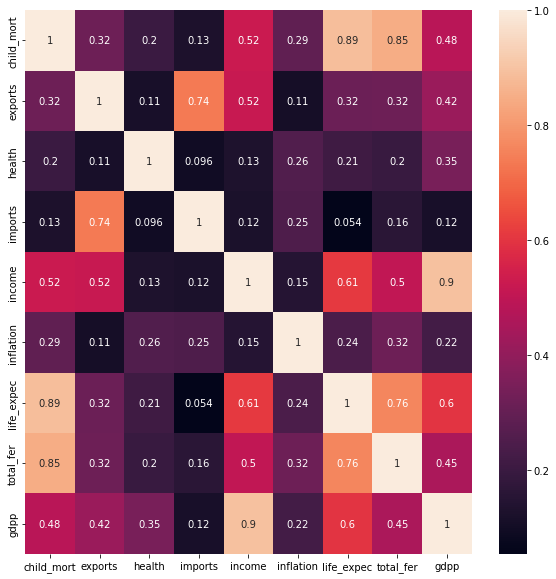

In [32]:
#Visualizing the feature's importance
economy_corr_data = country_df.drop(['Assigned_Cluster_Id'], axis=1)
correlation_matrix = economy_corr_data.corr().abs()
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_matrix,annot=True)
plt.savefig('Country_Economy_correlation_heatmap.jpeg', dpi=100)

- Gdpp is highly corelated with income and life expectancy
- Exports is highly corelated with income, and imports
- Imports is highly correlated with exports
- Income is highly correlated with gdpp, life expectancy and exports

In [33]:
#Preparing data for our model
clustering_economy_data = country_df.drop(['country', 'child_mort', 'total_fer','health'], axis=1)

In [34]:
#Scaling out input variables in a uniform scale
clustering_economy_data = StandardScaler().fit_transform(clustering_economy_data)

C:\Users\subas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


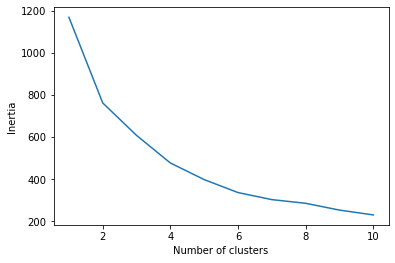

In [35]:
#Calculating inertia and plotting a graph against number of clusters
inertias = []
for i in range(1,15):
    km=KMeans(n_clusters=i, init='k-means++', max_iter=400, n_init=10, random_state=2)
    km.fit(clustering_economy_data)
    inertias.append(km.inertia_)
plt.plot(range(1,11),inertias)
plt.xlabel('Clusters #')
plt.ylabel('Total Inertia')
plt.savefig('inertia-2.jpeg', dpi=100)
plt.show()

In [36]:
#Creating Kmeans model with 3 clusters
kmeans_economy = KMeans(n_clusters=3, max_iter=300, random_state=6)

In [37]:
#Training our model using our dataset
kmeans_economy.fit(clustering_economy_data)

KMeans(n_clusters=3, random_state=6)

In [38]:
country_df['Assigned_Cluster_Id'] = kmeans_economy.labels_

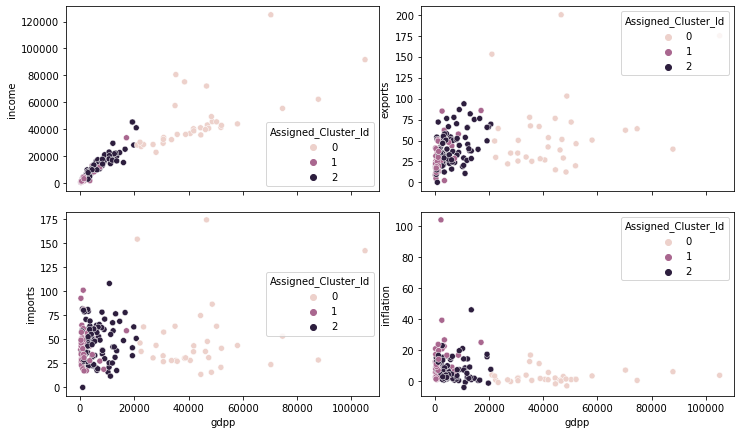

In [39]:
#Visualizing economical data after assigning cluster id
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize = (10,6))
fig.tight_layout()

sns.scatterplot(data=country_df, x='gdpp', y='income', hue='Assigned_Cluster_Id', ax=axes[0,0])
sns.scatterplot(data=country_df, x='gdpp', y='exports',hue='Assigned_Cluster_Id', ax=axes[0,1])
sns.scatterplot(data=country_df, x='gdpp', y='imports',hue='Assigned_Cluster_Id', ax=axes[1,0])
sns.scatterplot(data=country_df, x='gdpp', y='inflation', hue='Assigned_Cluster_Id', ax=axes[1,1])
plt.savefig('Economy-1.jpeg', dpi=100, bbox_inches='tight')
plt.show()

In [40]:
print(country_df['Assigned_Cluster_Id'].value_counts())

2    84
1    49
0    34
Name: Assigned_Cluster_Id, dtype: int64


In [41]:
print(country_df[country_df['Assigned_Cluster_Id']==2].head(5))

                country  child_mort  exports  health  imports  income  \
1               Albania        16.6     28.0    6.55     48.6    9930   
2               Algeria        27.3     38.4    4.17     31.4   12900   
4   Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
5             Argentina        14.5     18.9    8.10     16.0   18700   
6               Armenia        18.1     20.8    4.40     45.3    6700   
9            Azerbaijan        39.2     54.3    5.88     20.7   16000   
11              Bahrain         8.6     69.5    4.97     50.9   41100   
12           Bangladesh        49.4     16.0    3.52     21.8    2440   

    inflation  life_expec  total_fer   gdpp  Assigned_Cluster_Id  
1        4.49        76.3       1.65   4090                    2  
2       16.10        76.5       2.89   4460                    2  
4        1.44        76.8       2.13  12200                    2  
5       20.90        75.8       2.37  10300                    2  
6      

In [42]:
print(country_df[country_df['Assigned_Cluster_Id']==0].head(5))

       country  child_mort  exports  health  imports  income  inflation  \
7    Australia         4.8     19.8    8.73     20.9   41400      1.160   
8      Austria         4.3     51.3   11.00     47.8   43200      0.873   
10     Bahamas        13.8     35.0    7.89     43.7   22900     -0.393   
15     Belgium         4.5     76.4   10.70     74.7   41100      1.880   
23      Brunei        10.5     67.4    2.84     28.0   80600     16.700   
29      Canada         5.6     29.1   11.30     31.0   40700      2.870   
42      Cyprus         3.6     50.2    5.97     57.5   33900      2.010   
44     Denmark         4.1     50.5   11.40     43.6   44000      3.220   
53     Finland         3.0     38.7    8.95     37.4   39800      0.351   
54      France         4.2     26.8   11.90     28.1   36900      1.050   
58     Germany         4.2     42.3   11.60     37.1   40400      0.758   
60      Greece         3.9     22.1   10.30     30.7   28700      0.673   
68     Iceland         2.

In [43]:
print(country_df[country_df['Assigned_Cluster_Id']==1].head(6))

                     country  child_mort  exports  health  imports  income  \
0                Afghanistan        90.2    10.00    7.58     44.9    1610   
3                     Angola       119.0    62.30    2.85     42.9    5900   
17                     Benin       111.0    23.80    4.10     37.2    1820   
21                  Botswana        52.5    43.60    8.30     51.3   13300   
25              Burkina Faso       116.0    19.20    6.74     29.6    1430   
26                   Burundi        93.6     8.92   11.60     39.2     764   
28                  Cameroon       108.0    22.20    5.13     27.0    2660   
31  Central African Republic       149.0    11.80    3.98     26.5     888   
32                      Chad       150.0    36.80    4.53     43.5    1930   
36                   Comoros        88.2    16.50    4.51     51.7    1410   
37          Congo, Dem. Rep.       116.0    41.10    7.91     49.6     609   
38               Congo, Rep.        63.9    85.10    2.46     54